In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import wb #world bank
import math
import matplotlib as plt


plt.rcParams['figure.figsize'] = (30.0, 20.0)

In [2]:
 wb.search('gni').iloc[:,:2]

,id,name
686,6.0.GNIpc,GNI per capita (2011 $)
1703,DC.ODA.TLDC.GN.ZS,Net ODA provided to the least developed countr...
1705,DC.ODA.TOTL.GN.ZS,"Net ODA provided, total (% of GNI)"
2790,DT.DOD.DECT.GN.ZS,External debt stocks (% of GNI)
3622,DT.DOD.PVLX.GN.ZS,Present value of external debt (% of GNI)
3862,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI)
4265,DT.ODA.ODAT.GN.ZS,Net ODA received (% of GNI)
4401,DT.TDS.DECT.GN.ZS,Total debt service (% of GNI)
4599,DT.TDS.DPPG.GN.ZS,Public and publicly guaranteed debt service (%...
5596,IC.FRM.INNOV.T1,Percent of firms with an internationally-recog...


In [3]:
 wb.search('water').iloc[:,:2]

,id,name
79,2.0.cov.Wat,Coverage: Water
104,2.0.hoi.Wat,HOI: Water
679,5.51.01.09.water,Access to water
1662,DAK.INFR.H2O.CR,Total Specific Allocation Grant for Infrastruc...
4243,DT.ODA.DACD.WSS.CD,Gross ODA aid disbursement for water supply an...
4689,EE.BOD.TOTL.KG,Organic water pollutant (BOD) emissions (kg pe...
4794,ER.GDP.FWTL.M3.KD,"Water productivity, total (constant 2010 US$ G..."
4795,ER.H2O.FWAG.ZS,"Annual freshwater withdrawals, agriculture (% ..."
4796,ER.H2O.FWDM.ZS,"Annual freshwater withdrawals, domestic (% of ..."
4797,ER.H2O.FWIN.ZS,"Annual freshwater withdrawals, industry (% of ..."


In [4]:
ind = ["NY.GNP.PCAP.PP.CD", 'NY.GDP.PCAP.PP.CD', 'NY.GDP.PCAP.CD',  "NY.GNP.MKTP.PC.CD", 'NY.GDP.MKTP.CD']
data = wb.download(indicator = ind, country = ['ALL'], start = 2015, end = 2015)
data

,,NY.GNP.PCAP.PP.CD,NY.GDP.PCAP.PP.CD,NY.GDP.PCAP.CD,NY.GNP.MKTP.PC.CD,NY.GDP.MKTP.CD
country,year,,,,,
Arab World,2015,16428.806381,16454.577524,6545.217753,6527.598657,2.565871e+12
Caribbean small states,2015,15095.842513,15535.453196,9495.758444,9214.862118,6.693528e+10
Central Europe and the Baltics,2015,25251.372220,26151.245851,12403.328669,11972.392882,1.281495e+12
Early-demographic dividend,2015,8613.241339,8645.169100,3187.699012,3173.399515,9.954238e+12
East Asia & Pacific,2015,16127.641274,16105.792830,9397.921401,9439.935161,2.168000e+13
East Asia & Pacific (excluding high income),2015,12893.517217,12967.350787,6488.381689,6460.644104,1.320470e+13
East Asia & Pacific (IDA & IBRD countries),2015,13030.194927,13104.805027,6557.181062,NaN,1.317947e+13
Euro area,2015,41179.397060,41131.043913,34182.375862,34228.379902,1.160236e+13
Europe & Central Asia,2015,30039.689025,30308.539786,22112.394936,22009.530973,2.007682e+13


In [5]:
countries = wb.country_codes[249:-3]
countries_exceptions = "AIA ALA ATA ATF BES BLM BVT CCK COK CXR ESH FLK GGY GLP GUF HMD IOT JEY MSR MTQ MYT NFK NIU PCN REU SGS SHN SJM SPM TKL TWN UMI VAT WLF"

In [6]:
new_countries = sorted( list( set(countries) - set(countries_exceptions.split(" ")) ) )

In [7]:
line = "Aruba Andorra Afghanistan Angola Albania United Arab Emirates Argentina Armenia American Samoa Antigua and Barbuda Australia Austria Azerbaijan Burundi Belgium Benin Burkina Faso Bangladesh Bulgaria Bahrain Bahamas, The Bosnia and Herzegovina Belarus Belize Bermuda Bolivia Brazil Barbados Brunei Darussalam Bhutan Botswana Central African Republic Canada Switzerland Chile China Cote d'Ivoire Cameroon Congo, Rep. Colombia Comoros Cabo Verde Costa Rica Cuba Curacao Cayman Islands Cyprus Czech Republic Germany Djibouti Dominica Denmark Dominican Republic Algeria Ecuador Egypt, Arab Rep. Eritrea Spain Estonia Ethiopia Finland Fiji France Faroe Islands Micronesia, Fed. Sts. Gabon United Kingdom Georgia Ghana Gibraltar Guinea Gambia, The Guinea-Bissau Equatorial Guinea Greece Grenada Greenland Guatemala Guam Guyana Hong Kong SAR, China Honduras Croatia Haiti Hungary Indonesia Isle of Man India Ireland Iran, Islamic Rep. Iraq Iceland Israel Italy Jamaica Jordan Japan Kazakhstan Kenya Kyrgyz Republic Cambodia Kiribati St. Kitts and Nevis Korea, Rep. Kuwait Lao PDR Lebanon Liberia Libya St. Lucia Liechtenstein Sri Lanka Lesotho Lithuania Luxembourg Latvia Macao SAR, China St. Martin (French part) Morocco Monaco Moldova Madagascar Maldives Mexico Marshall Islands Macedonia, FYR Mali Malta Myanmar Montenegro Mongolia Northern Mariana Islands Mozambique Mauritania Mauritius Malawi Malaysia Namibia New Caledonia Niger Nigeria Nicaragua Netherlands Norway Nepal Nauru New Zealand Oman Pakistan Panama Peru Philippines Palau Papua New Guinea Poland Puerto Rico Korea, Dem. People’s Rep. Portugal Paraguay French Polynesia Qatar Romania Russian Federation Rwanda Saudi Arabia Sudan Senegal Singapore Solomon Islands Sierra Leone El Salvador San Marino Somalia Serbia South Sudan Sao Tome and Principe Suriname Slovak Republic Slovenia Sweden Swaziland Sint Maarten (Dutch part) Seychelles Syrian Arab Republic Turks and Caicos Islands Chad Togo Thailand Tajikistan Turkmenistan Timor-Leste Tonga Trinidad and Tobago Tunisia Turkey Tuvalu Tanzania Uganda Ukraine Uruguay United States Uzbekistan St. Vincent and the Grenadines Venezuela, RB British Virgin Islands Virgin Islands (U.S.) Vietnam Vanuatu West Bank and Gaza Samoa Yemen, Rep. South Africa Congo, Dem. Rep. Zambia Zimbabwe Korea, Dem. People's Rep. ABW AND AFG AGO ALB ARE ARG ARM ASM ATG AUS AUT AZE BDI BEL BEN BFA BGD BGR BHR BHS BIH BLR BLZ BMU BOL BRA BRB BRN BTN BWA CAF CAN CHE CHL CHN CIV CMR COG COL COM CPV CRI CUB CUW CYM CYP CZE DEU DJI DMA DNK DOM DZA ECU EGY ERI ESP EST ETH FIN FJI FRA FRO FSM GAB GBR GEO GHA GIB GIN GMB GNB GNQ GRC GRD GRL GTM GUM GUY HKG HND HRV HTI HUN IDN IMN IND IRL IRN IRQ ISL ISR ITA JAM JOR JPN KAZ KEN KGZ KHM KIR KNA KOR KWT LAO LBN LBR LBY LCA LIE LKA LSO LTU LUX LVA MAC MAF MAR MCO MDA MDG MDV MEX MHL MKD MLI MLT MMR MNE MNG MNP MOZ MRT MUS MWI MYS NAM NCL NER NGA NIC NLD NOR NPL NRU NZL OMN PAK PAN PER PHL PLW PNG POL PRI PRK PRT PRY PYF QAT ROU RUS RWA SAU SDN SEN SGP SLB SLE SLV SMR SOM SRB SSD STP SUR SVK SVN SWE SWZ SXM SYC SYR TCA TCD TGO THA TJK TKM TLS TON TTO TUN TUR TUV TZA UGA UKR URY USA UZB VCT VEN VGB VIR VNM VUT WSM WSM YEM ZAF COD ZMB ZWE PRK"

In [8]:
countries_full_name = "Aruba| Andorra| Afghanistan| Angola| Albania| United Arab Emirates| Argentina| Armenia| American Samoa| Antigua and Barbuda| Australia| Austria| Azerbaijan| Burundi| Belgium| Benin| Burkina Faso| Bangladesh| Bulgaria| Bahrain| Bahamas, The| Bosnia and Herzegovina| Belarus| Belize| Bermuda| Bolivia| Brazil| Barbados| Brunei Darussalam| Bhutan| Botswana| Central African Republic| Canada| Switzerland| Chile| China| Cote d'Ivoire| Cameroon| Congo, Rep.| Colombia| Comoros| Cabo Verde| Costa Rica| Cuba| Curacao| Cayman Islands| Cyprus| Czech Republic| Germany| Djibouti| Dominica| Denmark| Dominican Republic| Algeria| Ecuador| Egypt, Arab Rep.| Eritrea| Spain| Estonia| Ethiopia| Finland| Fiji| France| Faroe Islands| Micronesia, Fed. Sts.| Gabon| United Kingdom| Georgia| Ghana| Gibraltar| Guinea| Gambia, The| Guinea-Bissau| Equatorial Guinea| Greece| Grenada| Greenland| Guatemala| Guam| Guyana| Hong Kong SAR, China| Honduras| Croatia| Haiti| Hungary| Indonesia| Isle of Man| India| Ireland| Iran, Islamic Rep.| Iraq| Iceland| Israel| Italy| Jamaica| Jordan| Japan| Kazakhstan| Kenya| Kyrgyz Republic| Cambodia| Kiribati| St. Kitts and Nevis| Korea, Rep.| Kuwait| Lao PDR| Lebanon| Liberia| Libya| St. Lucia| Liechtenstein| Sri Lanka| Lesotho| Lithuania| Luxembourg| Latvia| Macao SAR, China| St. Martin (French part)| Morocco| Monaco| Moldova| Madagascar| Maldives| Mexico| Marshall Islands| Macedonia, FYR| Mali| Malta| Myanmar| Montenegro| Mongolia| Northern Mariana Islands| Mozambique| Mauritania| Mauritius| Malawi| Malaysia| Namibia| New Caledonia| Niger| Nigeria| Nicaragua| Netherlands| Norway| Nepal| Nauru| New Zealand| Oman| Pakistan| Panama| Peru| Philippines| Palau| Papua New Guinea| Poland| Puerto Rico| Korea, Dem. People’s Rep.| Portugal| Paraguay| French Polynesia| Qatar| Romania| Russian Federation| Rwanda| Saudi Arabia| Sudan| Senegal| Singapore| Solomon Islands| Sierra Leone| El Salvador| San Marino| Somalia| Serbia| South Sudan| Sao Tome and Principe| Suriname| Slovak Republic| Slovenia| Sweden| Swaziland| Sint Maarten (Dutch part)| Seychelles| Syrian Arab Republic| Turks and Caicos Islands| Chad| Togo| Thailand| Tajikistan| Turkmenistan| Timor-Leste| Tonga| Trinidad and Tobago| Tunisia| Turkey| Tuvalu| Tanzania| Uganda| Ukraine| Uruguay| United States| Uzbekistan| St. Vincent and the Grenadines| Venezuela, RB| British Virgin Islands| Virgin Islands (U.S.)| Vietnam| Vanuatu| West Bank and Gaza| Samoa| Yemen, Rep.| South Africa| Congo, Dem. Rep.| Zambia| Zimbabwe| Korea, Dem. People's Rep."

countries_code = "ABW| AND| AFG| AGO| ALB| ARE| ARG| ARM| ASM| ATG| AUS| AUT| AZE| BDI| BEL| BEN| BFA| BGD| BGR| BHR| BHS| BIH| BLR| BLZ| BMU| BOL| BRA| BRB| BRN| BTN| BWA| CAF| CAN| CHE| CHL| CHN| CIV| CMR| COG| COL| COM| CPV| CRI| CUB| CUW| CYM| CYP| CZE| DEU| DJI| DMA| DNK| DOM| DZA| ECU| EGY| ERI| ESP| EST| ETH| FIN| FJI| FRA| FRO| FSM| GAB| GBR| GEO| GHA| GIB| GIN| GMB| GNB| GNQ| GRC| GRD| GRL| GTM| GUM| GUY| HKG| HND| HRV| HTI| HUN| IDN| IMN| IND| IRL| IRN| IRQ| ISL| ISR| ITA| JAM| JOR| JPN| KAZ| KEN| KGZ| KHM| KIR| KNA| KOR| KWT| LAO| LBN| LBR| LBY| LCA| LIE| LKA| LSO| LTU| LUX| LVA| MAC| MAF| MAR| MCO| MDA| MDG| MDV| MEX| MHL| MKD| MLI| MLT| MMR| MNE| MNG| MNP| MOZ| MRT| MUS| MWI| MYS| NAM| NCL| NER| NGA| NIC| NLD| NOR| NPL| NRU| NZL| OMN| PAK| PAN| PER| PHL| PLW| PNG| POL| PRI| PRK| PRT| PRY| PYF| QAT| ROU| RUS| RWA| SAU| SDN| SEN| SGP| SLB| SLE| SLV| SMR| SOM| SRB| SSD| STP| SUR| SVK| SVN| SWE| SWZ| SXM| SYC| SYR| TCA| TCD| TGO| THA| TJK| TKM| TLS| TON| TTO| TUN| TUR| TUV| TZA| UGA| UKR| URY| USA| UZB| VCT| VEN| VGB| VIR| VNM| VUT| WSM| WSM| YEM| ZAF|COD| ZMB| ZWE|PRK"

In [9]:
country_dict = dict(zip( map(lambda x : x.strip(), countries_full_name.split("|")),\
                        map(lambda x : x.strip(), countries_code.split("|"))))

#countries_full_name.split("|")

In [38]:
data_2015 = wb.download(indicator = ind, country = new_countries, start = 2015, end = 2015).dropna()

data_2015_full = data_2015.copy()
codes = map( lambda x: country_dict[x], data_2015.index.get_level_values('country').values)
data_2015_full["CODE"] = codes

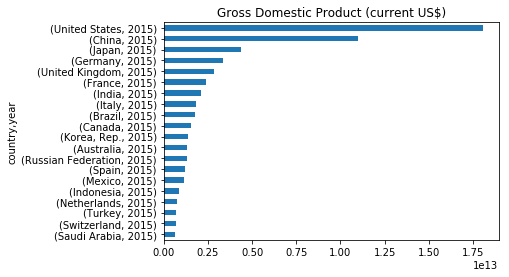

In [40]:
# top 10 countries with the largest GDP
%matplotlib inline
# GDP (current US$)
fig = data_2015["NY.GDP.MKTP.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                            .head(n=20).plot(kind="barh", title = "Gross Domestic Product (current US$)")

fig.invert_yaxis()
#fig.title = "GDP (current US$)"

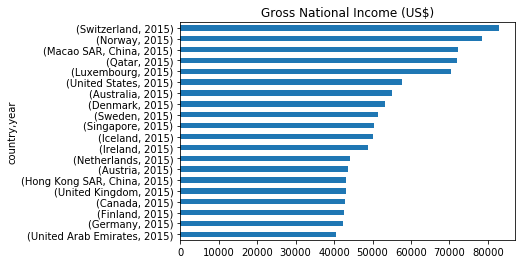

In [41]:
# top 10 countries with the largest GDP
%matplotlib inline
fig = data_2015["NY.GNP.MKTP.PC.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                               .head(n=20).plot(kind="barh", title="Gross National Income (US$)")
fig.invert_yaxis()

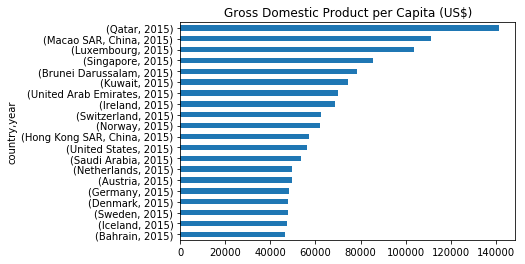

In [42]:
# top 10 countries with the largest GDP
%matplotlib inline
fig = data_2015["NY.GDP.PCAP.PP.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                               .head(n=20).plot(kind="barh", title="Gross Domestic Product per Capita (US$)")
fig.invert_yaxis()

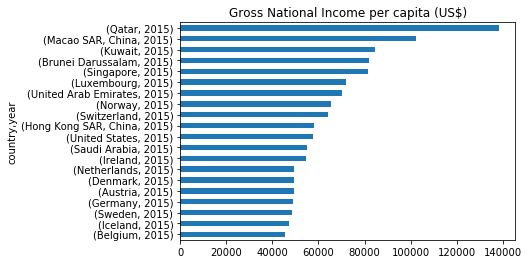

In [43]:
# top 10 countries with the largest GDP
%matplotlib inline
fig = data_2015["NY.GNP.PCAP.PP.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                               .head(n=20).plot(kind="barh", title="Gross National Income per capita (US$)")
fig.invert_yaxis()

In [44]:
data = wb.download(indicator = ind, country = new_countries, start = 2005, end = 2005)


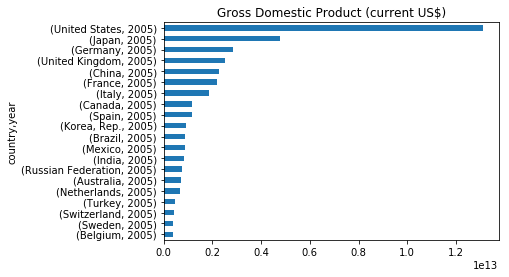

In [45]:
# top 10 countries with the largest GDP
%matplotlib inline
# GDP (current US$)
fig = data["NY.GDP.MKTP.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                            .head(n=20).plot(kind="barh", title = "Gross Domestic Product (current US$)")

fig.invert_yaxis()
#fig.title = "GDP (current US$)"

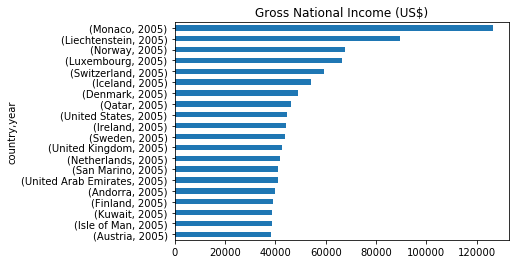

In [46]:
# top 10 countries with the largest GDP
%matplotlib inline
fig = data["NY.GNP.MKTP.PC.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                               .head(n=20).plot(kind="barh", title="Gross National Income (US$)")
fig.invert_yaxis()

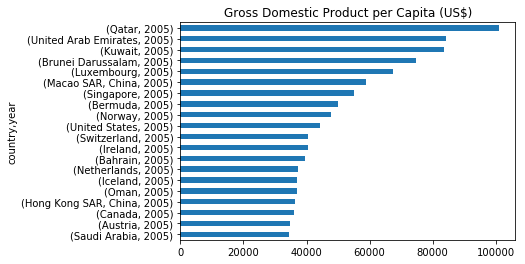

In [47]:
# top 10 countries with the largest GDP
%matplotlib inline
fig = data["NY.GDP.PCAP.PP.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                               .head(n=20).plot(kind="barh", title="Gross Domestic Product per Capita (US$)")
fig.invert_yaxis()

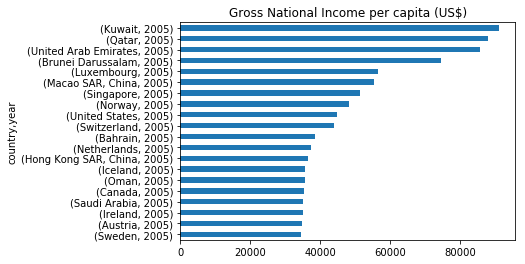

In [48]:
# top 10 countries with the largest GDP
%matplotlib inline
fig = data["NY.GNP.PCAP.PP.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                               .head(n=20).plot(kind="barh", title="Gross National Income per capita (US$)")
fig.invert_yaxis()

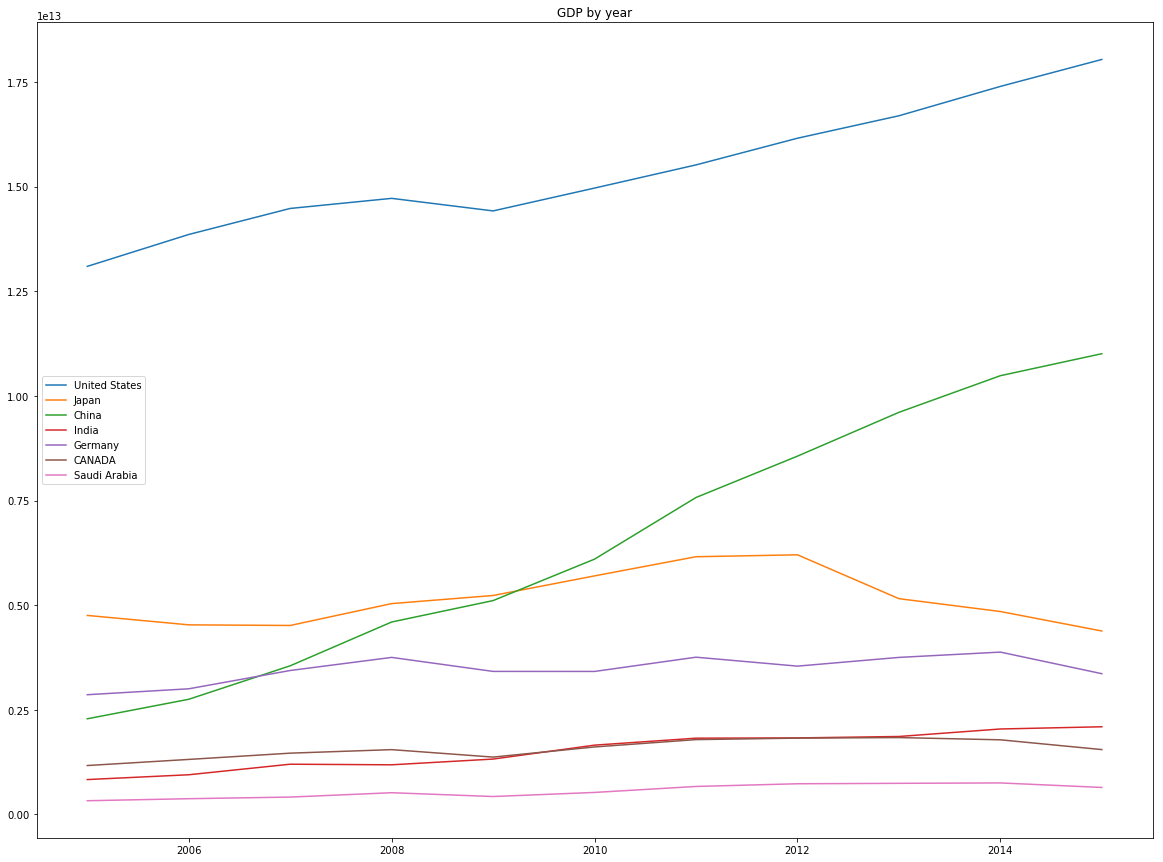

In [49]:
import matplotlib.pyplot as plt
country_small_set = ["USA", "JP", "CN", "IND", "DEU", "CAN", "SAU"]
country_full_name = ["United States", "Japan", "China", "India", "Germany", "CANADA", "Saudi Arabia"]
plt.figure(figsize = (20,15))


for ct in country_small_set:
    year_10_data = wb.download(indicator = ind, country = ct, start = 2005, end = 2015)
    plt.plot(year_10_data.index.get_level_values('year'),year_10_data["NY.GDP.MKTP.CD"])
plt.legend(country_full_name, loc="center left")
plt.title('GDP by year')

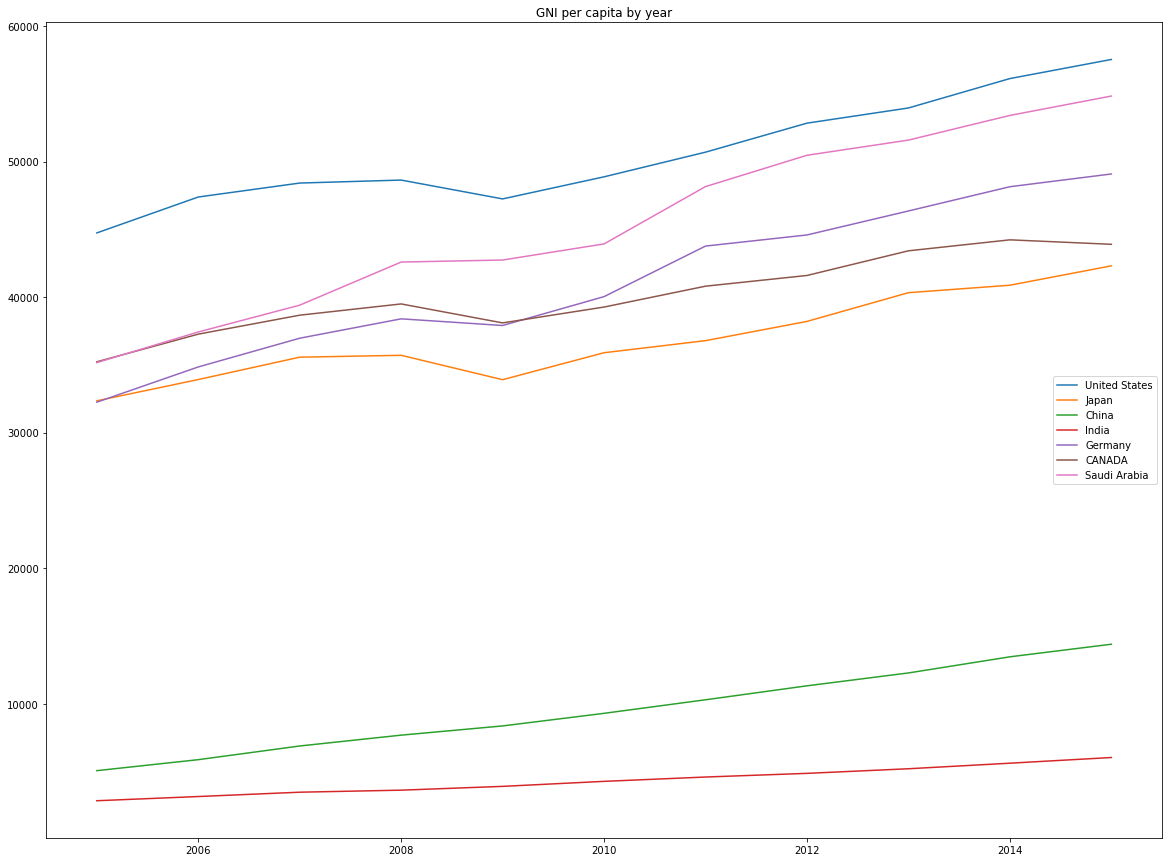

In [50]:
plt.figure(figsize = (20,15))
for ct in country_small_set:
    year_10_data = wb.download(indicator = ind, country = ct, start = 2005, end = 2015)
    plt.plot(year_10_data.index.get_level_values('year'),year_10_data["NY.GNP.PCAP.PP.CD"])
plt.legend(country_full_name, loc="center right")
plt.title('GNI per capita by year')

In [60]:
data_2005 = wb.download(indicator = ind, country = new_countries, start = 2005, end = 2005).dropna()

data_2005_full = data_2005.copy()
codes = map( lambda x: country_dict[x], data_2005.index.get_level_values('country').values)
data_2005_full["CODE"] = codes

In [51]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
def group_plot(X):
    # h is the step siz
    h_n = 100
    reduced_data = PCA(n_components=2).fit_transform(X)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(reduced_data)
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
    offset = 0.3
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - offset, reduced_data[:, 0].max() + offset
    y_min, y_max = reduced_data[:, 1].min() - offset, reduced_data[:, 1].max() + offset
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/h_n), np.arange(y_min, y_max, (y_max-y_min)/h_n))

    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.figure(figsize=(30,30))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    #plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=10)
    count = 0
    colors = "bgrcmykw"
    for i,j in zip(reduced_data[:, 0],reduced_data[:, 1]):
        corr = 0  # adds a little correction to put annotation in marker's centrum
        plt.annotate(X.index.get_level_values('country')[count],  xy=(i + corr, j + corr), size= 30, color=colors[count%8])
        count += 1
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the spx500 dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()


In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data.dropna())

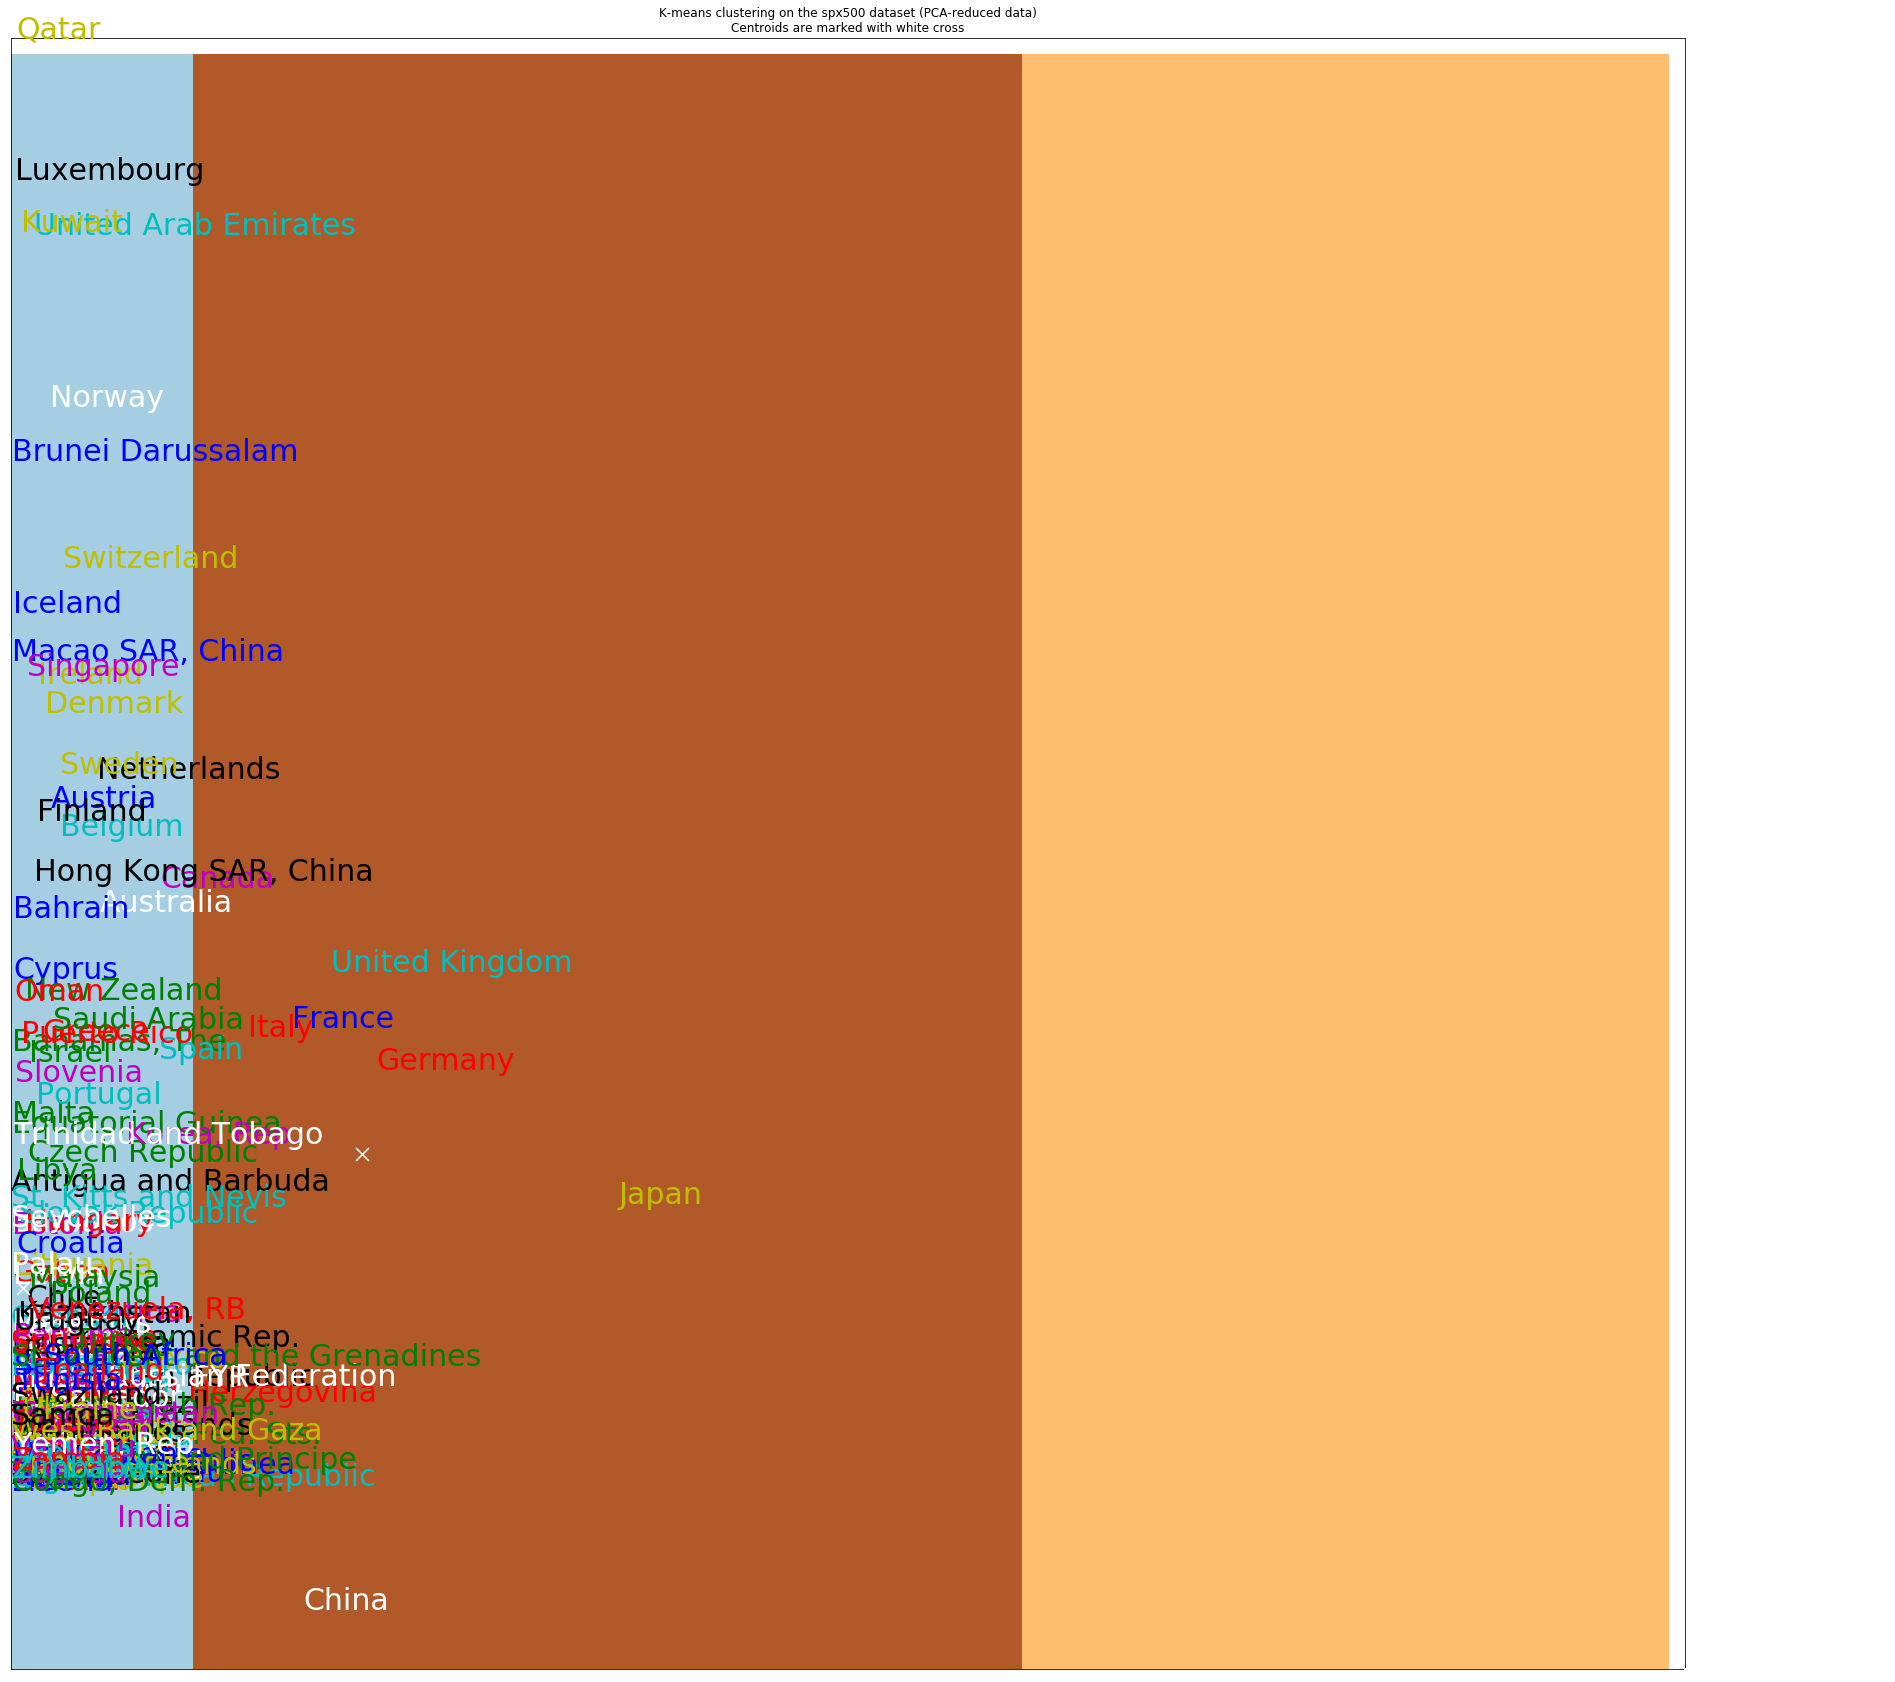

In [53]:
group_plot(data.dropna())

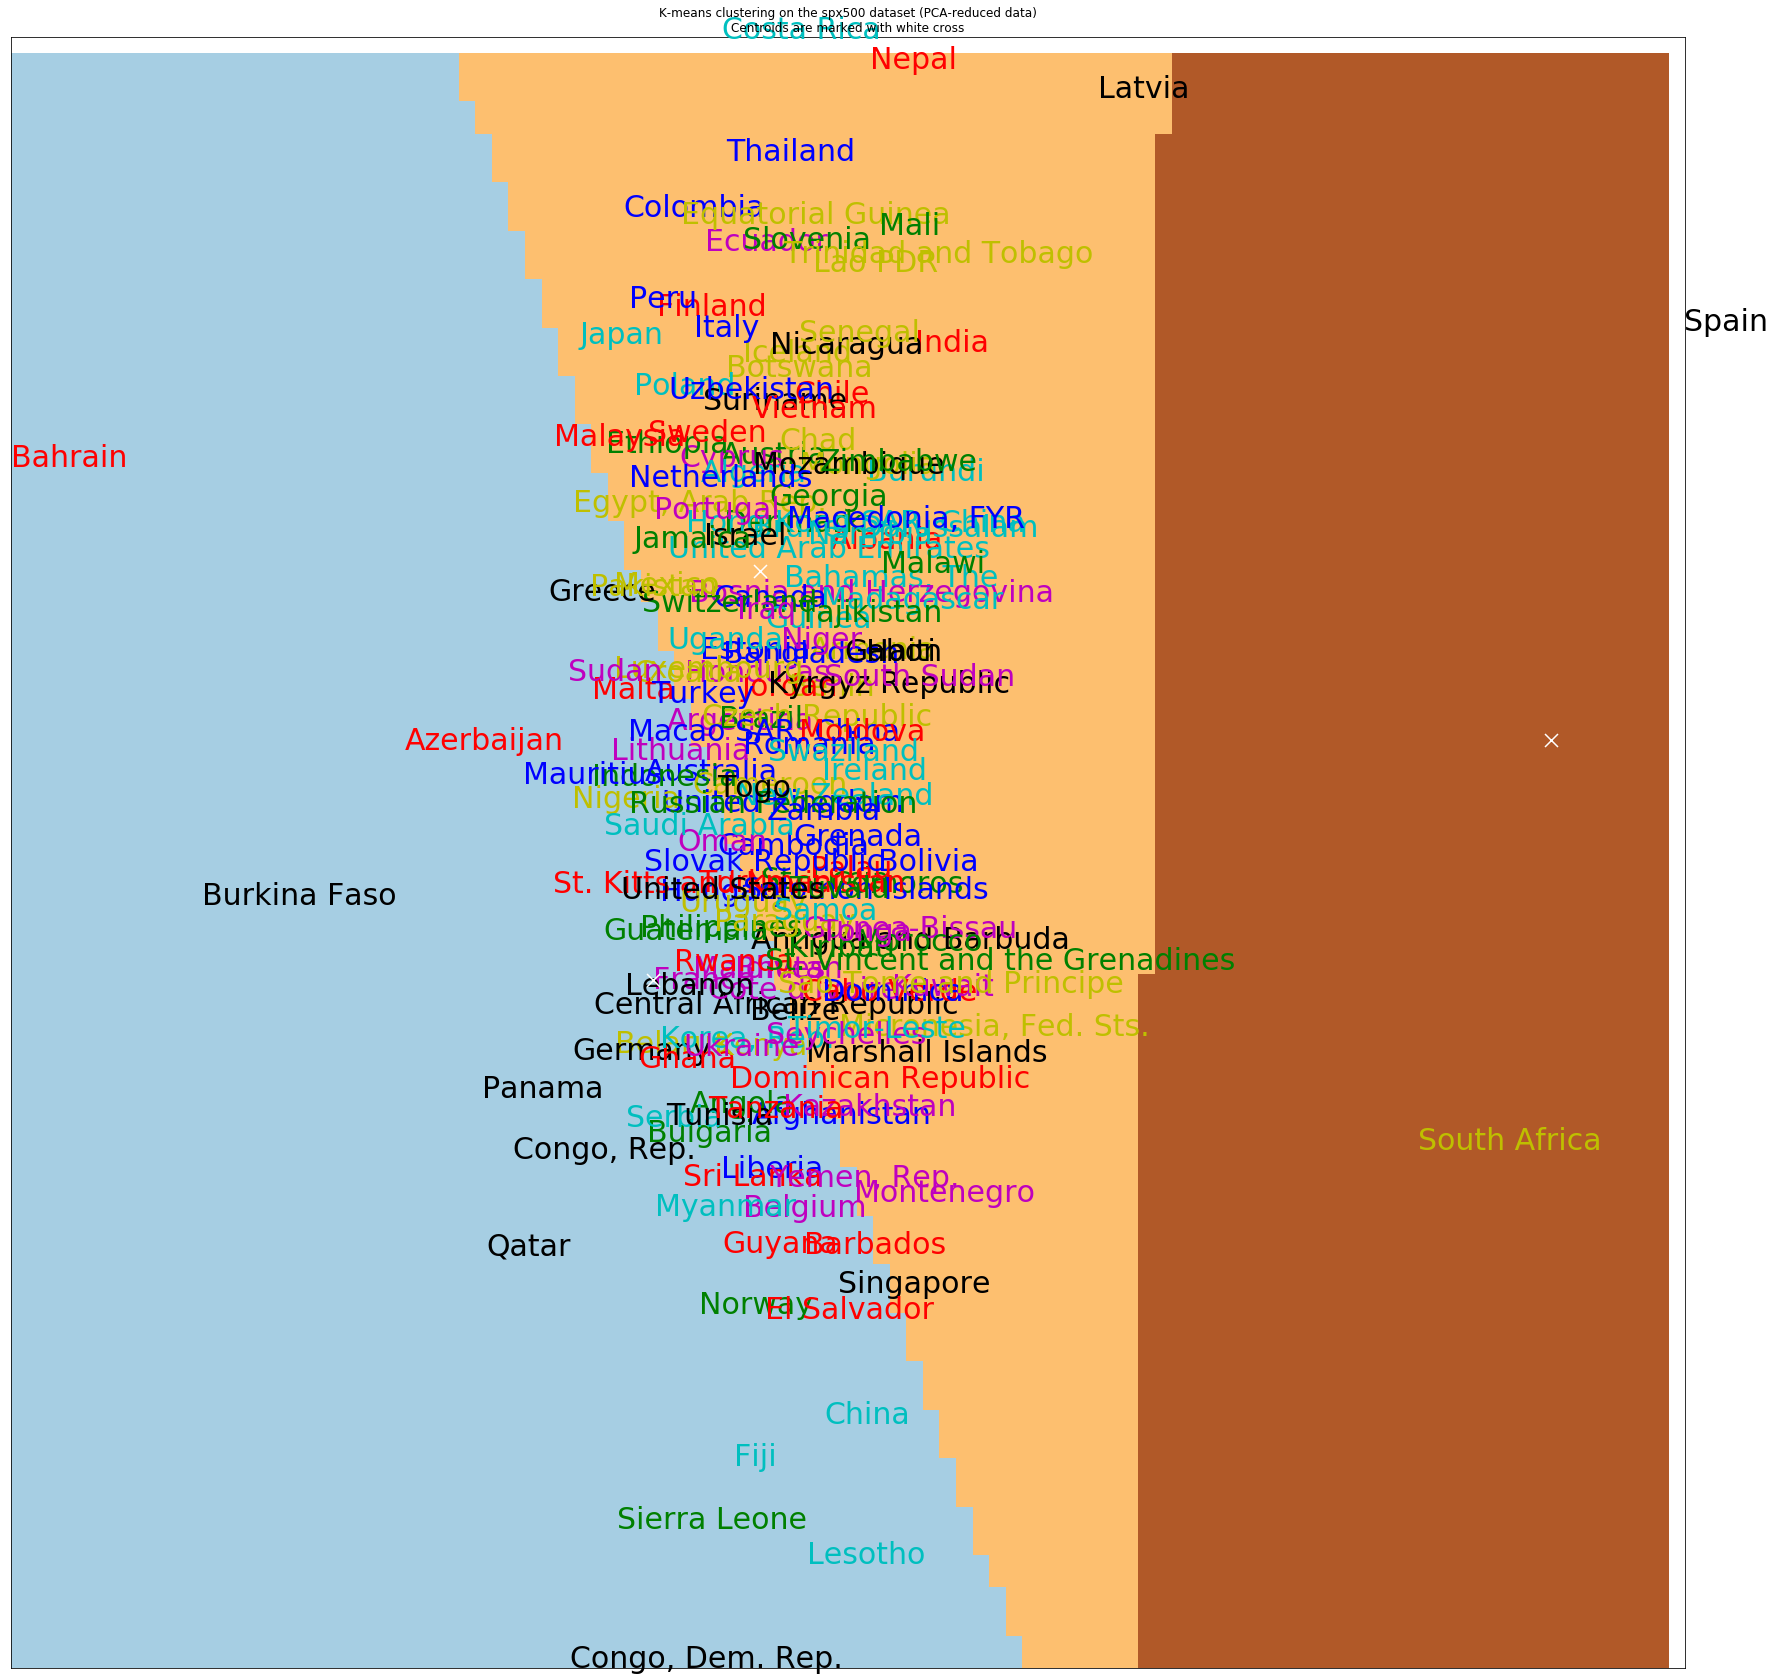

In [54]:

from sklearn.manifold import TSNE
def group_plot_TSNE(X):
    # h is the step siz
    h_n = 100
    reduced_data = TSNE(n_components=2).fit_transform(X)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(reduced_data)
    res = kmeans.predict(reduced_data)
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
    offset = 0.3
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - offset, reduced_data[:, 0].max() + offset
    y_min, y_max = reduced_data[:, 1].min() - offset, reduced_data[:, 1].max() + offset
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/h_n), np.arange(y_min, y_max, (y_max-y_min)/h_n))

    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.figure(figsize=(30,30))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    #plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=10)


    count = 0
    colors = "bgrcmykw"
    special_list = ["AAPL", "MSFT", "GOOG", "GOOGL", "DELL", "AMZN"]
    for i,j in zip(reduced_data[:, 0],reduced_data[:, 1]):
        corr = 0  # adds a little correction to put annotation in marker's centrum
        
        ticker = X.index.get_level_values('country')[count]
        if "Sector_id" in X.columns:
            plt.annotate(ticker,  xy=(i + corr, j + corr), size= 30, color=colors[X["Sector_id"][count]])
            
        else:
            if ticker in special_list:
                plt.annotate(ticker,  xy=(i + corr, j + corr), size= 30, color='w')
            else:
                plt.annotate(ticker,  xy=(i + corr, j + corr), size= 30, color=colors[count%7])
        count += 1
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the spx500 dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    return res
ans = group_plot_TSNE(data_2015.dropna())

In [55]:
country_data = wb.download(indicator = ind, country = new_countries, start = 2015, end = 2015).dropna()

In [56]:
country_data

,,NY.GNP.PCAP.PP.CD,NY.GDP.PCAP.PP.CD,NY.GDP.PCAP.CD,NY.GNP.MKTP.PC.CD,NY.GDP.MKTP.CD
country,year,,,,,
Afghanistan,2015,1940.0,1925.165228,594.323081,599.777088,1.933129e+10
Angola,2015,6470.0,7386.700843,4101.472152,3592.281890,1.026269e+11
Albania,2015,11310.0,11479.087460,3945.217582,3888.015544,1.139839e+10
United Arab Emirates,2015,70020.0,69970.815343,40438.762934,40468.467106,3.702963e+11
Argentina,2015,20010.0,20364.382205,13431.878340,13195.667539,5.831686e+11
Armenia,2015,8770.0,8418.727790,3489.127690,3633.400899,1.052918e+10
Antigua and Barbuda,2015,22280.0,23062.278265,13714.731962,13252.034419,1.259259e+09
Australia,2015,45320.0,46270.799339,56310.962993,55154.139786,1.339141e+12
Austria,2015,49160.0,49429.555546,43774.985174,43536.101562,3.769502e+11


In [58]:
import plotly 
plotly.tools.set_credentials_file(username='totolin', api_key='vS1reCdRS1BNqH9sbKss')
import plotly.plotly as py
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df = data_2015_full
data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['NY.GNP.PCAP.PP.CD'],
        text = df['CODE'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'GDP<br>Billions US$'),
      ) ]

layout = dict(
    title = '2014 Global GDP<br>Source:\
            <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~totolin/0 or inside your plot.ly account where it is named 'd3-world-map'


In [59]:
import plotly 
plotly.tools.set_credentials_file(username='liping', api_key='RMWQSMLdhyrtGcnGF447')
import plotly.plotly as py
import pandas as pd

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_2015_full.ix[:,:5])
data_2015_full['label'] = kmeans.labels_


#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df = data_2015_full
data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['label'],
        text = df['CODE'],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 1.0
            )
        ),
      ) ]

layout = dict(
    title = 'grouping countries into 3 groups using k mean',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~liping/0 or inside your plot.ly account where it is named 'd3-world-map'


In [61]:
import plotly 
plotly.tools.set_credentials_file(username='liping', api_key='RMWQSMLdhyrtGcnGF447')
import plotly.plotly as py
import pandas as pd

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_2005_full.ix[:,:5])
data_2005_full['label'] = kmeans.labels_


#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df = data_2005_full
data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['label'],
        text = df['CODE'],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 1.0
            )
        ),
      ) ]

layout = dict(
    title = 'grouping countries into 3 groups using k mean',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~liping/0 or inside your plot.ly account where it is named 'd3-world-map'
